In [1]:
pip install tld==0.6.3

  Using cached tld-0.6.3.tar.gz (27 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached six-1.4.1.tar.gz (21 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for tld: filename=tld-0.6.3-py3-none-any.whl size=28198 sha256=91c3bebd457bbfe602464b54c712f6121d3831c4f7f03605aac8305755253259
  Stored in directory: c:\users\akala\appdata\local\pip\cache\wheels\a6\1a\7e\647ae7068b8213eb9262765eeca86c9d9f6fbbf2570e7e76bc
  Created wheel for six: filename=six-1.4.1-py3-none-any.whl size=7347 sha256=1b5807d8bf7f2b8a4006cf06b2f352ec4267961c0f91ec180b5e9bcecac47e3c
  Stored in directory: c:\users\akala\appdata\local\pip\cache\wheels\ea\34\46\82762ae07ea76dfbd8888f39bcc17076825a8a0c34041f58d9
Successfully built tld six
  Attempting uninstall: six
    Found existing installation: six 1.16.0
    Uninstalling six-1.16.0:
      Successfully uninstalled six-1.16.0
N

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
python-dateutil 2.8.2 requires six>=1.5, but you have six 1.4.1 which is incompatible.
bleach 4.1.0 requires six>=1.9.0, but you have six 1.4.1 which is incompatible.


In [240]:
import numpy as np 
import pandas as pd
from urllib.parse import urlparse
from tld import get_tld

In [470]:
pd --version

NameError: name 'version' is not defined

In [294]:
urldata1 = pd.read_csv('https://raw.githubusercontent.com/shiveshsharma1/Karn-Anti-Phishing-App-Database/main/urldata1%20(2).csv?token=GHSAT0AAAAAACANCMESXA27O64NHB5C5ZCSZBAGOOA', on_bad_lines='skip')
urldata1.head()

,url,result
0,https://www.google.com,0
1,https://www.youtube.com,0
2,https://www.facebook.com,0
3,https://www.baidu.com,0
4,https://www.wikipedia.org,0


In [295]:
#Removing the unnamed columns as it is not necesary.
#urldata1 = urldata1.drop(['Unnamed: 0','label'],axis=1)
urldata1 = urldata1.rename(columns = {"result":"label"})
urldata1.head()

,url,label
0,https://www.google.com,0
1,https://www.youtube.com,0
2,https://www.facebook.com,0
3,https://www.baidu.com,0
4,https://www.wikipedia.org,0


In [296]:
urls_data = pd.read_csv("https://raw.githubusercontent.com/shiveshsharma1/Karn-Anti-Phishing-App-Database/main/urldata.csv?token=GHSAT0AAAAAACANCMESWW4WUO3XEQAZEJPEZBAGPXQ")
urls_data.head()

,url,label
0,diaryofagameaddict.com,bad
1,espdesign.com.au,bad
2,iamagameaddict.com,bad
3,kalantzis.net,bad
4,slightlyoffcenter.net,bad


In [297]:
def convert_to_int(word):
    word_dict = {'bad':1, 'good':0}
    return word_dict[word]

urls_data['label'] = urls_data['label'].apply(lambda x : convert_to_int(x))
urls_data.head()

,url,label
0,diaryofagameaddict.com,1
1,espdesign.com.au,1
2,iamagameaddict.com,1
3,kalantzis.net,1
4,slightlyoffcenter.net,1


In [298]:
urldata = pd.concat([urldata1, urls_data], ignore_index = True)
urldata.head()

,url,label
0,https://www.google.com,0
1,https://www.youtube.com,0
2,https://www.facebook.com,0
3,https://www.baidu.com,0
4,https://www.wikipedia.org,0


In [299]:
from urllib.parse import urlparse

In [300]:
urldata['url_length'] = urldata['url'].apply(lambda i: len(str(i)))

In [301]:
#Hostname Length
urldata['hostname_length'] = urldata['url'].apply(lambda i: len(urlparse(i).netloc))

In [302]:
urlparse('https://www.google.com').netloc

'www.google.com'

In [303]:
#Path Length
urldata['path_length'] = urldata['url'].apply(lambda i: len(urlparse(i).path))

In [304]:
urlparse('https://www.youtube.com/watch?v=megsXkCLzVo&list=RDmegsXkCLzVo&start_radio=1').path

'/watch'

In [305]:
#First Directory Length
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

urldata['fd_length'] = urldata['url'].apply(lambda i: fd_length(i))

In [306]:
#Length of Top Level Domain
urldata['tld'] = urldata['url'].apply(lambda i: get_tld(i,fail_silently=True))
def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1

urldata['tld_length'] = urldata['tld'].apply(lambda i: tld_length(i))
    



In [307]:
get_tld('https://www.youtube.com/watch?v=megsXkCLzVo&list=RDmegsXkCLzVo&start_radio=1')

'youtube.com'

In [308]:
urldata.head()

,url,label,url_length,hostname_length,path_length,fd_length,tld,tld_length
0,https://www.google.com,0,22,14,0,0,google.com,10
1,https://www.youtube.com,0,23,15,0,0,youtube.com,11
2,https://www.facebook.com,0,24,16,0,0,facebook.com,12
3,https://www.baidu.com,0,21,13,0,0,baidu.com,9
4,https://www.wikipedia.org,0,25,17,0,0,wikipedia.org,13


In [309]:
urldata = urldata.drop("tld",axis=1)

In [310]:
urldata.head()

,url,label,url_length,hostname_length,path_length,fd_length,tld_length
0,https://www.google.com,0,22,14,0,0,10
1,https://www.youtube.com,0,23,15,0,0,11
2,https://www.facebook.com,0,24,16,0,0,12
3,https://www.baidu.com,0,21,13,0,0,9
4,https://www.wikipedia.org,0,25,17,0,0,13


In [311]:
urldata['count-'] = urldata['url'].apply(lambda i: i.count('-'))
urldata['count@'] = urldata['url'].apply(lambda i: i.count('@'))
urldata['count?'] = urldata['url'].apply(lambda i: i.count('?'))
urldata['count%'] = urldata['url'].apply(lambda i: i.count('%'))
urldata['count.'] = urldata['url'].apply(lambda i: i.count('.'))
urldata['count='] = urldata['url'].apply(lambda i: i.count('='))
urldata['count-http'] = urldata['url'].apply(lambda i : i.count('http'))
urldata['count-https'] = urldata['url'].apply(lambda i : i.count('https'))
urldata['count-www'] = urldata['url'].apply(lambda i: i.count('www'))

In [312]:
# 5.Gives number of '/' in URL (URL_Depth)
def getDepth(url):
  s = urlparse(url).path.split('/')
  depth = 0
  for j in range(len(s)):
    if len(s[j]) != 0:
      depth = depth+1
  return depth

In [313]:
# 2.Checks for IP address in URL (Have_IP)
def havingIP(url):
  try:
    ipaddress.ip_address(url)
    ip = 1
  except:
    ip = 0
  return ip

In [314]:
# 6.Checking for redirection '//' in the url (Redirection)
def redirection(url):
  pos = url.rfind('//')
  if pos > 6:
    if pos > 7:
      return 1
    else:
      return 0
  else:
    return 0

In [315]:
#listing shortening services
shortening_services = r"bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|" \
                      r"yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|" \
                      r"short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|" \
                      r"doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|db\.tt|" \
                      r"qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|q\.gs|is\.gd|" \
                      r"po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|x\.co|" \
                      r"prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|" \
                      r"tr\.im|link\.zip\.net"
     

# 8. Checking for Shortening Services in URL (Tiny_URL)
def tinyURL(url):
    match=re.search(shortening_services,url)
    if match:
        return 1
    else:
        return 0

In [164]:
!pip install python-whois

     ---------------------------------------- 0.0/109.6 kB ? eta -:--:--
     --- ------------------------------------ 10.2/109.6 kB ? eta -:--:--
     ---------- -------------------------- 30.7/109.6 kB 435.7 kB/s eta 0:00:01
     ------------- ----------------------- 41.0/109.6 kB 330.3 kB/s eta 0:00:01
     ------------- ----------------------- 41.0/109.6 kB 330.3 kB/s eta 0:00:01
     -------------------- ---------------- 61.4/109.6 kB 328.2 kB/s eta 0:00:01
     --------------------------- --------- 81.9/109.6 kB 328.8 kB/s eta 0:00:01
     ------------------------------- ----- 92.2/109.6 kB 291.5 kB/s eta 0:00:01
     ------------------------------------ 109.6/109.6 kB 334.7 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/840.9 kB ? eta -:--:--
     ---------------------------------------- 0.0/840.9 kB ? eta -:--:--
     ----------------------------------------

In [316]:
# importing required packages for this section
import re
from bs4 import BeautifulSoup
import whois
import urllib
import urllib.request
from datetime import datetime

In [317]:
# 13.Survival time of domain: The difference between termination time and creation time (Domain_Age)  
def domainAge(domain_name):
  creation_date = domain_name.creation_date
  expiration_date = domain_name.expiration_date
  if (isinstance(creation_date,str) or isinstance(expiration_date,str)):
    try:
      creation_date = datetime.strptime(creation_date,'%Y-%m-%d')
      expiration_date = datetime.strptime(expiration_date,"%Y-%m-%d")
    except:
      return 1
  if ((expiration_date is None) or (creation_date is None)):
      return 1
  elif ((type(expiration_date) is list) or (type(creation_date) is list)):
      return 1
  else:
    ageofdomain = abs((expiration_date - creation_date).days)
    if ((ageofdomain/30) < 6):
      age = 1
    else:
      age = 0
  return age

In [318]:
# 14.End time of domain: The difference between termination time and current time (Domain_End) 
def domainEnd(domain_name):
  expiration_date = domain_name.expiration_date
  if isinstance(expiration_date,str):
    try:
      expiration_date = datetime.strptime(expiration_date,"%Y-%m-%d")
    except:
      return 1
  if (expiration_date is None):
      return 1
  elif (type(expiration_date) is list):
      return 1
  else:
    today = datetime.now()
    end = abs((expiration_date - today).days)
    if ((end/30) < 6):
      end = 0
    else:
      end = 1
  return end

In [170]:
pip install requests

     ---------------------------------------- 0.0/62.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/62.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/62.8 kB ? eta -:--:--
     ------------------ ------------------- 30.7/62.8 kB 187.9 kB/s eta 0:00:01
     ------------------ ------------------- 30.7/62.8 kB 187.9 kB/s eta 0:00:01
     ------------------------------ ------- 51.2/62.8 kB 219.0 kB/s eta 0:00:01
     -------------------------------------- 62.8/62.8 kB 210.3 kB/s eta 0:00:00
     ---------------------------------------- 0.0/140.9 kB ? eta -:--:--
     -- ------------------------------------- 10.2/140.9 kB ? eta -:--:--
     -------- ---------------------------- 30.7/140.9 kB 435.7 kB/s eta 0:00:01
     ---------- -------------------------- 41.0/140.9 kB 281.8 kB/s eta 0:00:01
     ---------------- -------------------- 61.4/140.9 kB 328.2 kB/s eta 0:00:01
     ---------------- -------------------- 61.4/140.9 kB 328.2 kB/s eta 0:0

In [319]:
# importing required packages for this section
import requests

In [320]:
# 15. IFrame Redirection (iFrame)
def iframe(response):
  if response == "":
      return 1
  else:
      if re.findall(r"[|]", response.text):
          return 0
      else:
          return 1

In [321]:
# 16.Checks the effect of mouse over on status bar (Mouse_Over)
def mouseOver(response): 
  if response == "" :
    return 1
  else:
    if re.findall("", response.text):
      return 1
    else:
      return 0

In [322]:
# 17.Checks the status of the right click attribute (Right_Click)
def rightClick(response):
  if response == "":
    return 1
  else:
    if re.findall(r"event.button ?== ?2", response.text):
      return 0
    else:
      return 1
     

In [323]:
# 18.Checks the number of forwardings (Web_Forwards)    
def forwarding(response):
  if response == "":
    return 1
  else:
    if len(response.history) <= 2:
      return 0
    else:
      return 1
     

In [324]:
urldata['have_ip'] = urldata['url'].apply(lambda i: havingIP(i))
urldata['depth'] = urldata['url'].apply(lambda i: getDepth(i))
urldata['red'] = urldata['url'].apply(lambda i: redirection(i))
urldata['tiny_url'] = urldata['url'].apply(lambda i: tinyURL(i))

try:
    response = requests.get(i)
except:
    response = ""
urldata['i_frame'] = urldata['url'].apply(lambda i: iframe(response))
urldata['mouse_over'] = urldata['url'].apply(lambda i: mouseOver(response))
urldata['right_click'] = urldata['url'].apply(lambda i: rightClick(response))
urldata['forwarding'] = urldata['url'].apply(lambda i: forwarding(response))

#urldata['have_ip'] = urldata['url'].apply(lambda i: havingIP(i))

In [325]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits
urldata['count-digits']= urldata['url'].apply(lambda i: digit_count(i))
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters
urldata['count-letters']= urldata['url'].apply(lambda i: letter_count(i))
def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')
urldata['count_dir'] = urldata['url'].apply(lambda i: no_of_dir(i))

In [326]:
urldata.head()

,url,label,url_length,hostname_length,path_length,fd_length,tld_length,count-,count@,count?,...,depth,red,tiny_url,i_frame,mouse_over,right_click,forwarding,count-digits,count-letters,count_dir
0,https://www.google.com,0,22,14,0,0,10,0,0,0,...,0,0,0,1,1,1,1,0,17,0
1,https://www.youtube.com,0,23,15,0,0,11,0,0,0,...,0,0,0,1,1,1,1,0,18,0
2,https://www.facebook.com,0,24,16,0,0,12,0,0,0,...,0,0,0,1,1,1,1,0,19,0
3,https://www.baidu.com,0,21,13,0,0,9,0,0,0,...,0,0,0,1,1,1,1,0,16,0
4,https://www.wikipedia.org,0,25,17,0,0,13,0,0,0,...,0,0,0,1,1,1,1,0,20,0


In [468]:
urldata.to_csv('url_data.csv', index=False)

In [327]:
urldata.tail()

,url,label,url_length,hostname_length,path_length,fd_length,tld_length,count-,count@,count?,...,depth,red,tiny_url,i_frame,mouse_over,right_click,forwarding,count-digits,count-letters,count_dir
793795,udemy.com,0,9,0,9,0,-1,0,0,0,...,1,0,0,1,1,1,1,0,8,0
793796,google,0,6,0,6,0,-1,0,0,0,...,1,0,0,1,1,1,1,0,6,0
793797,facebook,0,8,0,8,0,-1,0,0,0,...,1,0,0,1,1,1,1,0,8,0
793798,coursera,0,8,0,8,0,-1,0,0,0,...,1,0,0,1,1,1,1,0,8,0
793799,udemy,0,5,0,5,0,-1,0,0,0,...,1,0,0,1,1,1,1,0,5,0


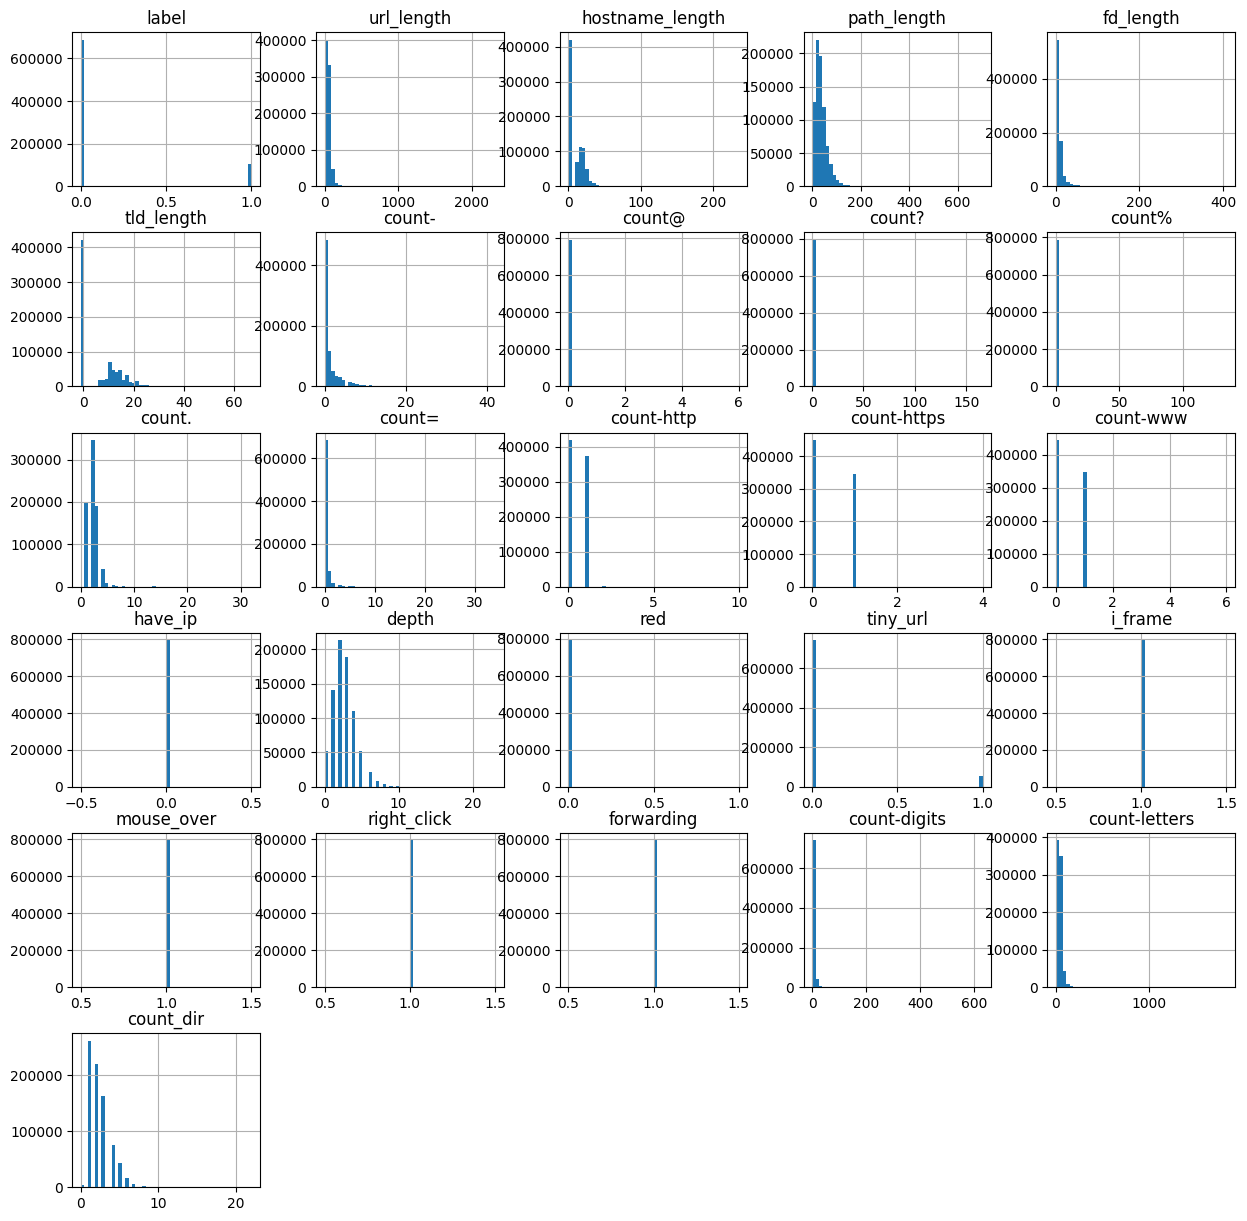

In [328]:
urldata.hist(bins = 50,figsize = (15,15))
plt.show()

In [472]:
pip freeze

alabaster @ file:///home/ktietz/src/ci/alabaster_1611921544520/work
anyio @ file:///C:/ci/anyio_1644481856696/work/dist
argon2-cffi @ file:///opt/conda/conda-bld/argon2-cffi_1645000214183/work
argon2-cffi-bindings @ file:///C:/ci/argon2-cffi-bindings_1644569876605/work
arrow @ file:///C:/b/abs_cal7u12ktb/croot/arrow_1676588147908/work
astroid @ file:///C:/b/abs_d4lg3_taxn/croot/astroid_1676904351456/work
asttokens @ file:///opt/conda/conda-bld/asttokens_1646925590279/work
atomicwrites==1.4.0
attrs @ file:///C:/b/abs_09s3y775ra/croot/attrs_1668696195628/work
autopep8 @ file:///opt/conda/conda-bld/autopep8_1650463822033/work
Babel @ file:///C:/b/abs_a2shv_3tqi/croot/babel_1671782804377/work
backcall @ file:///home/ktietz/src/ci/backcall_1611930011877/work
bcrypt @ file:///C:/Windows/Temp/abs_36kl66t_aw/croots/recipe/bcrypt_1659554334050/work
beautifulsoup4 @ file:///C:/ci/beautifulsoup4_1650293028159/work
binaryornot @ file:///tmp/build/80754af9/binaryornot_1617751525010/work
black @ fil

In [25]:
pip install scikit-learn

     ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
     ---------------------------------------- 0.1/8.3 MB 451.8 kB/s eta 0:00:19
     ---------------------------------------- 0.1/8.3 MB 451.8 kB/s eta 0:00:19
      --------------------------------------- 0.2/8.3 MB 591.4 kB/s eta 0:00:14
     - -------------------------------------- 0.2/8.3 MB 654.9 kB/s eta 0:00:13
     - -------------------------------------- 0.4/8.3 MB 825.0 kB/s eta 0:00:10
     - -------------------------------------- 0.4/8.3 MB 825.0 kB/s eta 0:00:10
     --- ------------------------------------ 0.7/8.3 MB 1.3 MB/s eta 0:00:06
     --- ------------------------------------ 0.7/8.3 MB 1.3 MB/s eta 0:00:07
     ----

In [329]:
#import scikit-learn as sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression

In [330]:
#Predictor Variables
x = urldata[['hostname_length',
       'path_length', 'fd_length', 'count-', 'count@', 'count?','count%', 'count.', 'count=', 'count-http','count-https', 'count-www', 'have_ip', 'red', 'tiny_url', 'i_frame', 'mouse_over', 'right_click', 'forwarding', 'count-digits',
       'count-letters', 'count_dir']]

#Target Variable
y = urldata['label']
#Splitting the data into Training and Testing
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.3, random_state=42)

In [204]:
#Decision Tree
dt_model1 = DecisionTreeClassifier()
dt_model1.fit(x_train.values,y_train.values)

dt_predictions = dt_model1.predict(x_test.values)
accuracy_score(y_test.values,dt_predictions)

0.9424198250728864

In [331]:
#Random Forest Classifier
dt_model = RandomForestClassifier()
dt_model.fit(x_train.values,y_train.values)

dt_predictions = dt_model.predict(x_test.values)
accuracy_score(y_test.values,dt_predictions)
#0.9548170086388659


0.9517222762120722

In [332]:
print(confusion_matrix(y_test,dt_predictions))

[[472704   8728]
 [ 18098  56130]]


In [467]:
import pickle
pickle.dump(dt_model,open("mypickle.pkl",'wb'))

In [220]:
pip install xgboost

     ---------------------------------------- 0.0/89.1 MB ? eta -:--:--
     --------------------------------------- 0.0/89.1 MB 660.6 kB/s eta 0:02:15
     --------------------------------------- 0.0/89.1 MB 393.8 kB/s eta 0:03:47
     --------------------------------------- 0.1/89.1 MB 655.4 kB/s eta 0:02:16
     --------------------------------------- 0.1/89.1 MB 654.9 kB/s eta 0:02:16
     --------------------------------------- 0.2/89.1 MB 807.1 kB/s eta 0:01:51
     --------------------------------------- 0.2/89.1 MB 811.5 kB/s eta 0:01:50
     --------------------------------------- 0.3/89.1 MB 896.4 kB/s eta 0:01:40
     --------------------------------------- 0.3/89.1 MB 895.6 kB/s eta 0:01:40
     --------------------------------------- 0.4/89.1 MB 971.5 kB/s eta 0:01:32
     --------------------------------------- 0.5/89.1 MB 972.0 kB/s eta 0:01:32
     --------------------------------------- 0.5/89.1 MB 962.6 kB/s eta 0:01:33
     --------------------------------------- 0.5

In [225]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
#fit the model
xgb.fit(x_train.values, y_train.values)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [226]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(x_test.values)
y_train_xgb = xgb.predict(x_train.values)

In [227]:
#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train.values,y_train_xgb)
acc_test_xgb = accuracy_score(y_test.values,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.956
XGBoost : Accuracy on test Data: 0.949


In [333]:
def website(site):
    from urllib.parse import urlparse
    from tld import get_tld
    import requests
    url_length = len(str(site))
    hostname_length = len(urlparse(site).netloc)
    path_length = len(urlparse(site).path)
    def fd_length(url):
        urlpath= urlparse(url).path
        try:
            return len(urlpath.split('/')[1])
        except:
            return 0
    fd_length = fd_length(site)
    tld = get_tld(site,fail_silently=True)
    def tld_length(tld):
        try:
            return len(tld)
        except:
            return -1

    tld_length = tld_length(get_tld(site,fail_silently=True))
    def digit_count(url):
        digits = 0
        for i in url:
            if i.isnumeric():
                digits = digits + 1
        return digits
    count_digits= digit_count(site)
    def letter_count(url):
        letters = 0
        for i in url:
            if i.isalpha():
                letters = letters + 1
        return letters
    count_letters = letter_count(site)
    def no_of_dir(url):
        urldir = urlparse(url).path
        return urldir.count('/')
    count_dir=no_of_dir(site)
    count_ = site.count('-')
    count_ad = site.count('@')
    count_qu = site.count('?')
    count_pr = site.count('%')
    count_dot = site.count('.')
    count_eql = site.count('=')
    count_http = site.count('http')
    count_https = site.count('https')
    count_www = site.count('www')
    
  
  

    # 2.Checks for IP address in URL (Have_IP)
    def havingIP(url):
        try:
            ipaddress.ip_address(url)
            ip = 1
        except:
            ip = 0
        return ip
    having_ip = havingIP(site)

     # 6.Checking for redirection '//' in the url (Redirection)
    def redirection(url):
        pos = url.rfind('//')
        if pos > 6:
            if pos > 7:
                return 1
            else:
                return 0
        else:
            return 0
        
    red = redirection(site)
        #listing shortening services
    shortening_services = r"bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|" \
                      r"yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|" \
                      r"short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|" \
                      r"doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|db\.tt|" \
                      r"qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|q\.gs|is\.gd|" \
                      r"po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|x\.co|" \
                      r"prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|" \
                      r"tr\.im|link\.zip\.net"
     

        # 8. Checking for Shortening Services in URL (Tiny_URL)
    def tinyURL(url):
        match=re.search(shortening_services,url)
        if match:
            return 1
        else:
            return 0
    tiny_url = tinyURL(site)
    
    
    
    
    
    
    # 15. IFrame Redirection (iFrame)
    def iframe(response):
        if response == "":
            return 1
        else:
            if re.findall(r"[|]", response.text):
                return 0
            else:
                return 1
        # 16.Checks the effect of mouse over on status bar (Mouse_Over)
    def mouseOver(response): 
        if response == "" :
            return 1
        else:
            if re.findall("", response.text):
                return 1
            else:
                return 0

    
    
    

         # 17.Checks the status of the right click attribute (Right_Click)
    def rightClick(response):
        if response == "":
            return 1
        else:
            if re.findall(r"event.button ?== ?2", response.text):
                return 0
            else:
                return 1




        # 18.Checks the number of forwardings (Web_Forwards)    
    def forwarding(response):
        if response == "":
            return 1
        else:
            if len(response.history) <= 2:
                return 0
            else:
                return 1
     
    try:
        response = requests.get(site)
    except:
        response = ""
    i_frame = iframe(response)
    mouse_over = mouseOver(response)
    right_click = rightClick(response)
    forwar = forwarding(response)
        
    
    
    
    
    












   
         
    site_dict = [hostname_length,
       path_length, fd_length, count_, count_ad, count_qu,
       count_pr, count_dot, count_eql, count_http,count_https, count_www, having_ip, red, tiny_url, i_frame, mouse_over, right_click, forwar, count_digits,
       count_letters, count_dir]
    return site_dict

In [365]:
def take_txt(file_path):
    import re
 
    with open(file_path) as file:
        n = 0;
        for line in file:
            site = re.findall('https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+', line)
            print(site)
            site_dict=website(site[n])
            print(*site_dict, sep = ", ")
            phishing_predict = dt_model.predict([website(site[n])])
            n = n+1
            if phishing_predict == 0:
                print('You are Using Safe Website')
            else:
                print('url may be a spam')

        

In [366]:
take_txt('url.txt')

[]


IndexError: list index out of range

In [336]:
import pickle

In [341]:
file_name = 'phising_link_det'
pickle.dump(take_txt,open(file_name,'wb'))

In [344]:
t=pickle.load(open(file_name,'rb'))

In [347]:
t('url.txt')

['http://eie.nits.ac.in']
14, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 15, 0
url may be a spam
['https://www.tutorialspoint.com']
22, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 25, 0
You are Using Safe Website


In [466]:
with open('sample','wb') as f:
    pickle.dump(take_txt,f)

In [463]:
import socket
socket.socket
s = urlparse('https://banco-general-seervicos.jimdosite.com/').netloc
print(s)
#url = f"s"
#ip_add= socket.gethostbyname(s)
#print(ip_add)

banco-general-seervicos.jimdosite.com


In [464]:
ip_add= socket.gethostbyname(s)
print(ip_add)

162.159.129.70


In [370]:
pip install geocoder


     ---------------------------------------- 0.0/98.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/98.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/98.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/98.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/98.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/98.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/98.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/98.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/98.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/98.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/98.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/98.6 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/98.6 kB ? eta -:--:--
     ------------ --------------------------- 30.7/98.6 kB 1.4

In [372]:
pip install folium

     ---------------------------------------- 0.0/102.3 kB ? eta -:--:--
     ---------------------------------------- 0.0/102.3 kB ? eta -:--:--
     ---------------------------------------- 0.0/102.3 kB ? eta -:--:--
     ---------------------------------------- 0.0/102.3 kB ? eta -:--:--
     ---------------------------------------- 0.0/102.3 kB ? eta -:--:--
     ---------------------------------------- 0.0/102.3 kB ? eta -:--:--
     ---------------------------------------- 0.0/102.3 kB ? eta -:--:--
     ---------------------------------------- 0.0/102.3 kB ? eta -:--:--
     ----------------------- --------------- 61.4/102.3 kB 3.2 MB/s eta 0:00:01
     ----------------------- --------------- 61.4/102.3 kB 3.2 MB/s eta 0:00:01
     ----------------------- --------------- 61.4/102.3 kB 3.2 MB/s eta 0:00:01
     ----------------------- --------------- 61.4/102.3 kB 3.2 MB/s eta 0:00:01
     ----------------------- --------------- 61.4/102.3 kB 3.2 MB/s eta 0:00:01
     -----------

In [465]:
import geocoder
geo_code_of_ip = geocoder.ip("162.159.129.70")
lati_long = geo_code_of_ip.latlng
import folium
map1 = folium.Map(location=lati_long,zoom_start=10)
folium.Marker(location=lati_long,popup="address").add_to(map1)
map1.save("ip_loc.html")
import webbrowser
webbrowser.open("ip_loc.html",new=2)

True

In [411]:
import requests
from bs4 import BeautifulSoup

def get_ip_from_ipvoid(url):
    # send a GET request to the ipvoid website with the url parameter
    response = requests.get(f'https://www.ipvoid.com/ip-lookup/{url}/')
    
    # parse the HTML response with BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # extract the IP address from the response
    ip = soup.find_all('td')[2].text.strip()
    
    return ip

In [412]:
url = "http://www.nits.ac.in/"
ip = get_ip_from_ipvoid(url)
print(ip)  # output: 142.251.36.68

IndexError: list index out of range

In [420]:
import urllib.request
import re

def get_ip_address(url):
    try:
        with urllib.request.urlopen("http://" + url) as response:
            html = response.read().decode('utf-8')
            pattern = r"\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}"
            match = re.search(pattern, html)
            if match:
                return match.group()
            else:
                return None
    except urllib.error.URLError:
        return None

# Example usage
url = "www.google.com"
ip_address = get_ip_address(url)
print("IP address for", url, "is", ip_address)



IP address for www.google.com is None


In [422]:
pip install tldextract

     ---------------------------------------- 0.0/93.9 kB ? eta -:--:--
     ------------- -------------------------- 30.7/93.9 kB 1.3 MB/s eta 0:00:01
     ------------------------ ------------- 61.4/93.9 kB 544.7 kB/s eta 0:00:01
     -------------------------------------- 93.9/93.9 kB 760.9 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [423]:
import tldextract
import requests

def get_ip_address(url):
    try:
        # Extract the domain name from the URL
        domain = tldextract.extract(url).domain

        # Send a HEAD request to the domain and extract the IP address from the response headers
        response = requests.head("http://" + domain)
        ip_address = response.headers.get('X-Forwarded-For', response.headers.get('X-Real-IP', response.headers.get('CF-Connecting-IP', None)))
        return ip_address
    except requests.exceptions.RequestException:
        return None

# Example usage
url = "www.google.com"
ip_address = get_ip_address(url)
print("IP address for", url, "is", ip_address)


IP address for www.google.com is None


In [424]:
import socket

def get_ip_address(url):
    try:
        ip_address = socket.gethostbyname(url)
        return ip_address
    except socket.gaierror:
        return None

# Example usage
url = "www.google.com"
ip_address = get_ip_address(url)
print("IP address for", url, "is", ip_address)


IP address for www.google.com is 142.250.206.164


In [426]:
import subprocess
import re

def get_ip_address(url):
    try:
        # Run the ping command and capture the output
        ping_output = subprocess.check_output(['ping', '-c', '1', url])

        # Extract the IP address from the output using a regular expression
        match = re.search(r'[\d]+\.[\d]+\.[\d]+\.[\d]+', ping_output.decode())
        if match:
            ip_address = match.group()
            return ip_address
        else:
            return None
    except subprocess.CalledProcessError:
        return None

# Example usage
url = "www.google.com"
ip_address = get_ip_address(url)
print("IP address for", url, "is", ip_address)


IP address for www.google.com is None


In [427]:
import subprocess

# Get IP address using ping
def get_ip_address_ping(hostname):
    try:
        ping_output = subprocess.check_output(["ping", "-c", "1", hostname])
        ping_output_str = ping_output.decode('utf-8')
        start_index = ping_output_str.find("(") + 1
        end_index = ping_output_str.find(")")
        return ping_output_str[start_index:end_index]
    except subprocess.CalledProcessError:
        return None

# Get IP address using traceroute
def get_ip_address_traceroute(hostname):
    try:
        traceroute_output = subprocess.check_output(["traceroute", "-w", "2", "-q", "1", "-n", hostname])
        traceroute_output_str = traceroute_output.decode('utf-8')
        lines = traceroute_output_str.splitlines()
        last_line = lines[-1]
        last_hop = last_line.split()[1]
        return last_hop
    except subprocess.CalledProcessError:
        return None

# Example usage
hostname = "www.google.com"
ip_address_ping = get_ip_address_ping(hostname)
ip_address_traceroute = get_ip_address_traceroute(hostname)
print("IP address using ping: ", ip_address_ping)
print("IP address using traceroute: ", ip_address_traceroute)


FileNotFoundError: [WinError 2] The system cannot find the file specified

In [440]:
import requests
import socket

# List of 10 websites to check IP address
websites = ['https://ipinfo.io/ip', 'https://api.ipify.org', 'https://checkip.amazonaws.com', 
            'https://ifconfig.co/ip', 'https://icanhazip.com', 'https://ip.tyk.nu', 
            'https://ipecho.net/plain', 'https://ipapi.co/ip', 'https://myexternalip.com/raw', 
            'https://www.trackip.net/ip']

# Domain name to get IP address for
domain = 'http://www.nits.ac.in/'

# Resolve domain to IP address
ip = socket.gethostbyname(domain)

# Print resolved IP address
print(f"Resolved IP address for {domain}: {ip}\n")

# Check IP address from each website in the list
for website in websites:
    try:
        response = requests.get(website, timeout=5)
        website_ip = response.text.strip()
        print(f"IP address from {website}: {website_ip}")
        
        # Check if website IP matches resolved IP address
        if website_ip == ip:
            print(f"Match found between {website} and resolved IP address.\n")
        else:
            print(f"No match found between {website} and resolved IP address.\n")
    
    except Exception as e:
        print(f"Error checking IP address from {website}")

gaierror: [Errno 11001] getaddrinfo failed

In [441]:
import socket
import requests

def get_ips(domain):
    ips = []
    
    # Query 10 different sites to get IP addresses
    sites = ['https://www.ipvoid.com/ip-lookup/', 
             'https://www.yougetsignal.com/tools/web-sites-on-web-server/php/get-web-sites-on-web-server-json-data.php', 
             'https://www.whois.com/whois/', 
             'https://www.tcpiputils.com/hostname-to-ip-address', 
             'https://www.site24x7.com/find-ip-address-of-web-site.html', 
             'https://dnschecker.org/ip-location.php', 
             'https://www.ip-tracker.org/locator/ip-lookup.php', 
             'https://www.whatismyip.com/ip-address-lookup/', 
             'https://www.ultratools.com/tools/ipWhoisLookup', 
             'https://www.site24x7.com/find-ip-address-of-a-site.html']
    
    for site in sites:
        try:
            if 'whois' in site:
                response = requests.get(site + domain)
                ip = socket.gethostbyname(response.url.split('/')[-1])
            else:
                response = requests.get(site, params={'remoteAddress': domain})
                ip = response.json().get('ip', None)
            
            if ip:
                ips.append(ip)
        except:
            pass
    
    return ips

In [451]:
import requests
import re
import socket
import time

# List of websites to use for IP address resolution
websites = ['https://www.iplocation.net/ip-address-lookup',
            'https://www.whatismyip.com/',
            'https://www.iplocation.net/ip-lookup',
            'https://www.whatismyip.net/',
            'https://www.whatismyip.org/',
            'https://www.whatismyipaddress.com/',
            'https://ipinfo.io/ip',
            'https://ip-lookup.net/',
            'https://www.ipaddress.com/',
            'https://www.myip.com/']

# IPVoid API URL
ipvoid_url = 'https://www.boat-lifestyle.com/collections/?utm_source=Google&utm_medium=Search&utm_campaign=SB_Search_Brand_India_Sep2020&gclid=EAIaIQobChMIp-OGz8H__QIVUZNmAh1WDQ7VEAAYASAAEgIDyPD_BwE'

# Regular expression pattern to extract IP address from HTML
ip_pattern = r'\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}'

# Initialize a list to store the resolved IP addresses
ip_addresses = []

# Loop through the list of websites and extract the IP addresses
for website in websites:
    try:
        # Send a GET request to the website and extract the HTML
        response = requests.get(website)
        html = response.text
        
        # Extract the IP address using regex and append to the list
        ip = re.findall(ip_pattern, html)[0]
        ip_addresses.append(ip)
        
        # Add a delay to avoid overloading the websites
        time.sleep(1)
        
    except Exception as e:
        # Print an error message if something goes wrong
        print(f"Error: {e}")
        
# Verify the IP addresses using IPVoid
for ip in ip_addresses:
    try:
        # Send a POST request to IPVoid with the IP address
        response = requests.post(ipvoid_url, data={'ip': ip})
        
        # Extract the blacklisting status from the HTML response
        html = response.text
        is_blacklisted = 'yes' in html.lower()
        
        # Print the IP address and its status
        print(f"{ip} is {'not ' if not is_blacklisted else ''}blacklisted")
        
        # Add a delay to avoid overloading IPVoid
        time.sleep(1)
        
    except Exception as e:
        # Print an error message if something goes wrong
        print(f"Error: {e}")

Error: list index out of range
Error: list index out of range
Error: list index out of range
Error: list index out of range
Error: list index out of range
Error: list index out of range
Error: list index out of range
Error: list index out of range
152.58.145.247 is blacklisted
152.58.145.247 is blacklisted


In [452]:
import requests
import socket
import re
import time

def get_ip_address(url):
    # try up to 3 times to get the IP address
    for i in range(3):
        try:
            # send request to website and get response content
            response = requests.get(url)
            content = response.text

            # search for IP address using regular expression
            ip_address = re.search(r'\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}', content)

            # return IP address if found
            if ip_address:
                return ip_address.group(0)
            else:
                # if IP address not found, raise error
                raise Exception('IP address not found')

        except (requests.exceptions.RequestException, socket.timeout, socket.gaierror, Exception) as e:
            # if request fails or IP address not found, retry after 5 seconds
            print(f'Retrying in 5 seconds ({i+1}/3 attempts)...')
            time.sleep(5)
            continue
    
    # if IP address not found after 3 attempts, raise error
    raise Exception('Could not retrieve IP address')

In [453]:
get_ip_address("https://www.boat-lifestyle.com/collections/?utm_source=Google&utm_medium=Search&utm_campaign=SB_Search_Brand_India_Sep2020&gclid=EAIaIQobChMIp-OGz8H__QIVUZNmAh1WDQ7VEAAYASAAEgIDyPD_BwE")

'1.942.204.526'

In [456]:
import socket
import requests

def get_ip_address(domain):
    # First try to get the IP address using socket module
    try:
        ip = socket.gethostbyname(domain)
        return ip
    except:
        pass
    
    # If socket fails, try multiple APIs and services to get the IP address
    urls = [
        f"https://api.hackertarget.com/hostsearch/?q={domain}",
        f"https://api.viewdns.info/reverseip/?host={domain}&t=1",
        f"https://www.iptrackeronline.com/index.php?ip_address={domain}&action=lookup",
        f"https://domains.yougetsignal.com/domains.php",
        f"https://tools.keycdn.com/geo.json?host={domain}",
        f"https://www.robtex.com/dns-lookup/{domain}",
        f"https://ipapi.co/{domain}/json/",
        f"https://www.tcpiputils.com/ajax/search_results.php",
        f"https://ip.nf/{domain}.json",
        f"https://ipinfo.io/{domain}/json"
    ]
    
    for url in urls:
        try:
            response = requests.get(url)
            if response.status_code == 200:
                ip = response.text.splitlines()[0]
                if len(ip.split(".")) == 4:
                    return ip
        except:
            pass
        
    return None

In [458]:
get_ip_address("")

'There was an error processing your API key - it may be invalid or disabled.  Please try again later.  If the problem continues to occur please contact the webmaster.'

In [ ]:
with open('sample','wb') as f:
    pickle.dump()

In [471]:
pip freeze

alabaster @ file:///home/ktietz/src/ci/alabaster_1611921544520/work
anyio @ file:///C:/ci/anyio_1644481856696/work/dist
argon2-cffi @ file:///opt/conda/conda-bld/argon2-cffi_1645000214183/work
argon2-cffi-bindings @ file:///C:/ci/argon2-cffi-bindings_1644569876605/work
arrow @ file:///C:/b/abs_cal7u12ktb/croot/arrow_1676588147908/work
astroid @ file:///C:/b/abs_d4lg3_taxn/croot/astroid_1676904351456/work
asttokens @ file:///opt/conda/conda-bld/asttokens_1646925590279/work
atomicwrites==1.4.0
attrs @ file:///C:/b/abs_09s3y775ra/croot/attrs_1668696195628/work
autopep8 @ file:///opt/conda/conda-bld/autopep8_1650463822033/work
Babel @ file:///C:/b/abs_a2shv_3tqi/croot/babel_1671782804377/work
backcall @ file:///home/ktietz/src/ci/backcall_1611930011877/work
bcrypt @ file:///C:/Windows/Temp/abs_36kl66t_aw/croots/recipe/bcrypt_1659554334050/work
beautifulsoup4 @ file:///C:/ci/beautifulsoup4_1650293028159/work
binaryornot @ file:///tmp/build/80754af9/binaryornot_1617751525010/work
black @ fil

In [473]:
pip show pandas

Name: pandas
Version: 1.5.3
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: The Pandas Development Team
Author-email: pandas-dev@python.org
License: BSD-3-Clause
Location: c:\users\akala\anaconda3\envs\py2\lib\site-packages
Requires: numpy, python-dateutil, pytz
Required-by: seaborn
Note: you may need to restart the kernel to use updated packages.


In [474]:
pip show urllib.parse

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip show re

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip show ipaddress

Note: you may need to restart the kernel to use updated packages.


In [5]:
conda --version

conda 23.1.0

Note: you may need to restart the kernel to use updated packages.
